In [1]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import pandas as pd
import sys
if 'RaTag' not in sys.path:
    sys.path.append('RaTag')

In [2]:
from RaTag.scripts.crystalball_fitter import *
from RaTag.scripts.alpha_spectrum_simulator import *
from RaTag.scripts.unit_conversion import *

# Automatic energy scale calibration from MCA spectrum

In [3]:
ROOT_PATH = '/Users/pabloherrero/sabat/RaTagging/RaTag/MCA_spectra'
file_spectrum = ROOT_PATH +'/Second_Th_loaded_detector_in_air.csv'
sc = SpectrumCalibrator(file_spectrum)
nuclides = sc.run()

<Axes: title={'center': 'Spectrum with Peaks'}, xlabel='Channel', ylabel='Counts'>

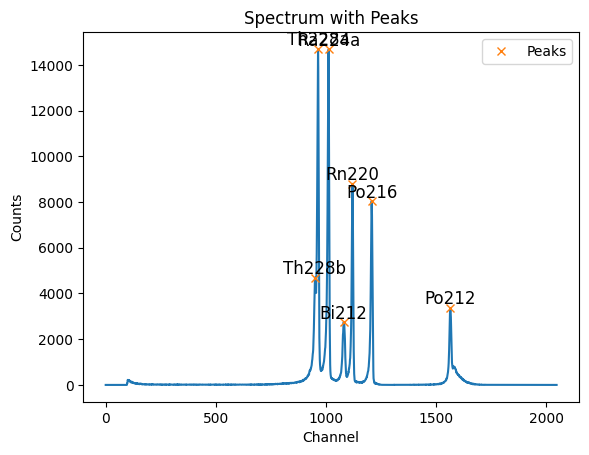

In [4]:
sc.plot_spectrum()

<Axes: title={'center': 'Energy Calibration'}, xlabel='Energy (keV)', ylabel='Channel'>

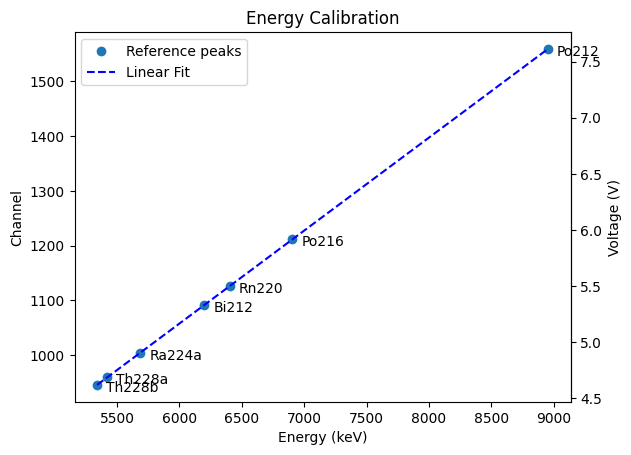

In [5]:
sc.plot_calibration()

# Crystalball fitting

<Axes: title={'center': 'ROI 1130–1250'}, xlabel='Channel', ylabel='Normalized Counts'>

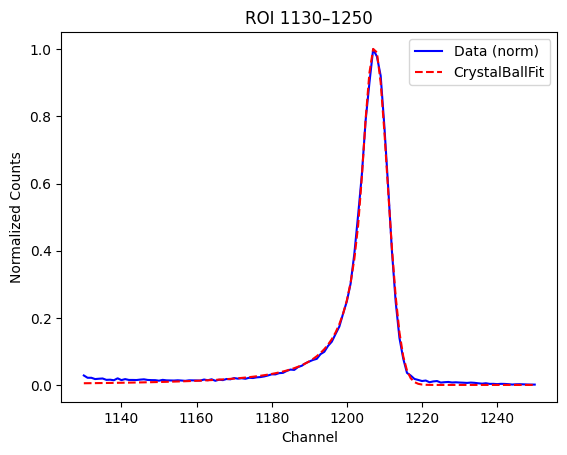

In [7]:
from RaTag.scripts.crystalball_fitter import CrystalBallFitter

fitter = CrystalBallFitter(file_spectrum, cutdown=1130, cutup=1250)
fitter.load()
fitter.select_roi()
res = fitter.fit()
fig, ax = plt.subplots()
fitter.plot_fit(ax)

<Axes: title={'center': 'Crystal Ball Samples'}, xlabel='Channel', ylabel='Counts'>

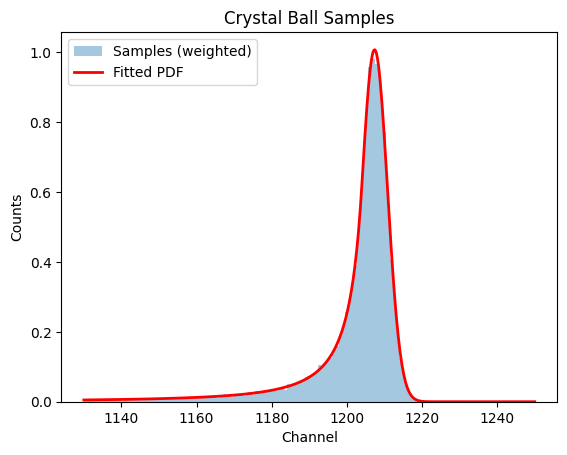

In [8]:
samples = fitter.generate_samples(50_000)
fig, ax = plt.subplots()
fitter.plot_samples(samples, ax)